### Time Resampling and Time Shifting

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("starbucks.csv", index_col= "Date", parse_dates= True)

In [5]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [6]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [7]:
df.shape

(1006, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [9]:
df.describe()

,Close,Volume
count,1006.000000,1.006000e+03
mean,54.070133,9.617402e+06
std,4.849600,4.986199e+06
min,36.974800,2.215418e+06
25%,52.170075,6.828217e+06
50%,54.631600,8.338076e+06
75%,56.603475,1.091071e+07
max,68.353000,6.209107e+07


### Time Resampling:

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [10]:
# Year Wise Average:

df.resample(rule= "A").mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


<AxesSubplot:xlabel='Date'>

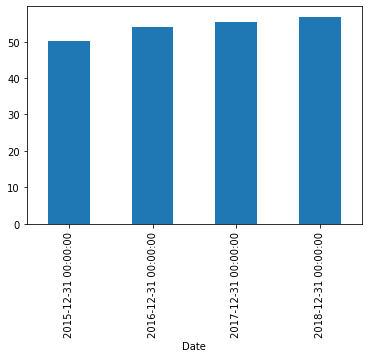

In [15]:
df.resample(rule= "A").mean()["Close"].plot(kind= "bar")

<AxesSubplot:title={'center':'Month Wise Total Volume'}, xlabel='Date'>

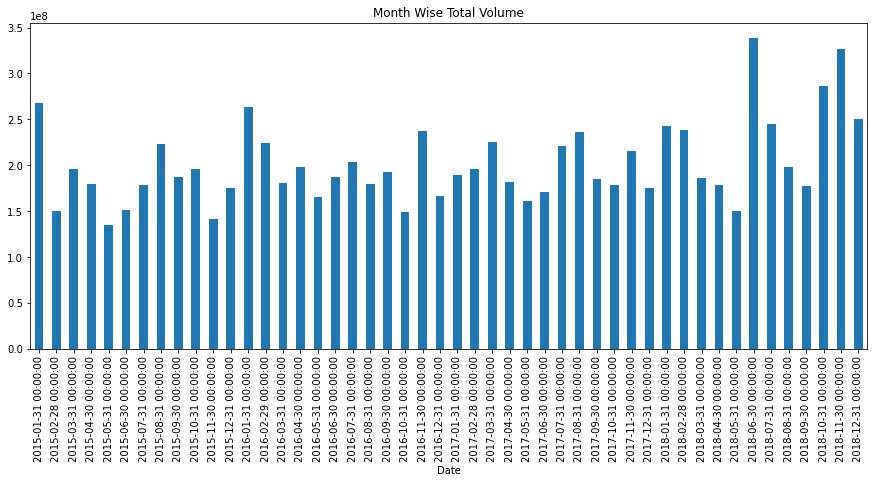

In [20]:
# Month Wise Total Volume:

df["Volume"].resample(rule= "M").sum().plot(kind= "bar", figsize=(15,6), title= "Month Wise Total Volume")

<AxesSubplot:title={'center':'Quarter Wise Average Closing Price'}, xlabel='Date'>

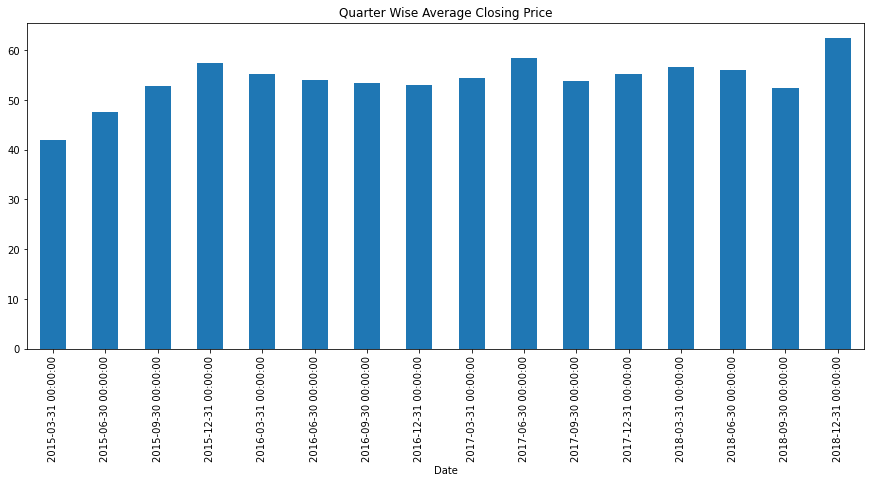

In [22]:
# Quarter Wise Average Closing Price:

df["Close"].resample(rule= "Q").mean().plot(kind= "bar", figsize=(15,6), title= "Quarter Wise Average Closing Price")

### Time Shifting:

This method shifts the entire date index a given number of rows, without regard for time periods (months & years).
It returns a modified copy of the original DataFrame.

In [23]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [25]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [26]:
df.shift(periods= 1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [27]:
df.shift(periods= 5)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,64.47,15143054.0
2018-12-26,64.92,10523476.0
2018-12-27,64.06,14390146.0


In [28]:
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


We can choose to shift index values up or down without realigning the data by passing in a freq argument.
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end.

In [30]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [29]:
df.shift(periods= 1, freq= "M")

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


In [31]:
df.shift(periods= 1, freq= "Y")

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2015-12-31,37.2781,11623796
2015-12-31,36.9748,7664340
2015-12-31,37.8848,9732554
2015-12-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081
